In [78]:
import numpy as np
import os
from tensorflow.keras import applications
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dropout,Flatten,Dense,GlobalAveragePooling2D

In [79]:
files_train=0
files_validation=0
cwd=os.getcwd()
folder='/content/drive/MyDrive/parking project/train_data/train'

for sub_folder in os.listdir(folder):
  path,dirs,files=next(os.walk(os.path.join(folder,sub_folder)))
  files_train=files_train+len(files)
folder='/content/drive/MyDrive/parking project/train_data/test'

for sub_folder in os.listdir(folder):
  path,dirs,files=next(os.walk(os.path.join(folder,sub_folder)))
  files_validation=files_validation+len(files)
print(files_train,files_validation)


432 164


In [80]:
img_width,img_height=48,48
train_data_dir='/content/drive/MyDrive/parking project/train_data/train'
validation_data_dir='/content/drive/MyDrive/parking project/train_data/test'
nb_train_sample=files_train
nb_validation_sample=files_validation
batch_size=32
epochs=15
num_classes=2

In [81]:
model=applications.VGG16(weights='imagenet',include_top=False,input_shape=(img_width,img_height,3))

In [82]:
model.layers

[<InputLayer name=input_layer_6, built=True>,
 <Conv2D name=block1_conv1, built=True>,
 <Conv2D name=block1_conv2, built=True>,
 <MaxPooling2D name=block1_pool, built=True>,
 <Conv2D name=block2_conv1, built=True>,
 <Conv2D name=block2_conv2, built=True>,
 <MaxPooling2D name=block2_pool, built=True>,
 <Conv2D name=block3_conv1, built=True>,
 <Conv2D name=block3_conv2, built=True>,
 <Conv2D name=block3_conv3, built=True>,
 <MaxPooling2D name=block3_pool, built=True>,
 <Conv2D name=block4_conv1, built=True>,
 <Conv2D name=block4_conv2, built=True>,
 <Conv2D name=block4_conv3, built=True>,
 <MaxPooling2D name=block4_pool, built=True>,
 <Conv2D name=block5_conv1, built=True>,
 <Conv2D name=block5_conv2, built=True>,
 <Conv2D name=block5_conv3, built=True>,
 <MaxPooling2D name=block5_pool, built=True>]

In [83]:
for layer in model.layers[:10]:
  layer.trainable=False

In [84]:
x=model.output
x=Flatten()(x)
predictions = Dense(num_classes, activation='softmax')(x)
model_final = Model(inputs=model.input, outputs=predictions)
model_final.compile(loss='categorical_crossentropy',optimizer=optimizers.SGD(learning_rate=0.0001,momentum=0.9),metrics=['accuracy'])

In [85]:
train_datagen=ImageDataGenerator(rescale=1.0/255,horizontal_flip=True,fill_mode='nearest',zoom_range=0.1,width_shift_range=0.1,height_shift_range=0.1,rotation_range=5)
test_datagen=ImageDataGenerator(rescale=1.0/255,horizontal_flip=True,fill_mode='nearest',zoom_range=0.1,width_shift_range=0.1,height_shift_range=0.1,rotation_range=5)
train_generator=train_datagen.flow_from_directory(train_data_dir,target_size=(img_height,img_width),batch_size=batch_size,class_mode='categorical')
validation_generator=test_datagen.flow_from_directory(validation_data_dir,target_size=(img_height,img_width),batch_size=batch_size,class_mode='categorical')

Found 432 images belonging to 2 classes.
Found 164 images belonging to 2 classes.


In [90]:
history=model_final.fit(train_generator,steps_per_epoch=nb_train_sample//batch_size,validation_steps=nb_validation_sample//batch_size,epochs=epochs,validation_data=validation_generator)

Epoch 1/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 40s 3s/step - accuracy: 0.9809 - loss: 0.0796 - val_accuracy: 0.9125 - val_loss: 0.2001
Epoch 2/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 383ms/step - accuracy: 0.9375 - loss: 0.1313 - val_accuracy: 0.9375 - val_loss: 0.1904
Epoch 3/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 70s 3s/step - accuracy: 0.9812 - loss: 0.0681 - val_accuracy: 0.9312 - val_loss: 0.1537
Epoch 4/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 747ms/step - accuracy: 0.9375 - loss: 0.1103 - val_accuracy: 0.9312 - val_loss: 0.1675
Epoch 5/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 72s 3s/step - accuracy: 0.9738 - loss: 0.0719 - val_accuracy: 0.9438 - val_loss: 0.1666
Epoch 6/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 477ms/step - accuracy: 1.0000 - loss: 0.0223 - val_accuracy: 0.9187 - val_loss: 0.1803
Epoch 7/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 73s 3s/step - accuracy: 0.9826 - loss: 0.0586 - val_accuracy: 0.9250 - val_loss: 0.1835
Epoch 8/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 466ms/step - accuracy: 1.0000 - loss: 0.0460 - val_accuracy: 0.9438 - 

In [92]:
history.history

{'accuracy': [0.9825000166893005,
  0.9375,
  0.9900000095367432,
  0.9375,
  0.9825000166893005,
  1.0,
  0.987500011920929,
  1.0,
  0.9800000190734863,
  1.0,
  0.9855769276618958,
  1.0,
  0.9925000071525574,
  1.0,
  0.9900000095367432],
 'loss': [0.07413638383150101,
  0.13132157921791077,
  0.05902683362364769,
  0.11025896668434143,
  0.06283853203058243,
  0.02227703109383583,
  0.05181563273072243,
  0.04598187655210495,
  0.06068147346377373,
  0.019088514149188995,
  0.0490286722779274,
  0.011696180328726768,
  0.04244944453239441,
  0.014920158311724663,
  0.03658456727862358],
 'val_accuracy': [0.9125000238418579,
  0.9375,
  0.9312499761581421,
  0.9312499761581421,
  0.9437500238418579,
  0.918749988079071,
  0.925000011920929,
  0.9437500238418579,
  0.9312499761581421,
  0.9624999761581421,
  0.9375,
  0.949999988079071,
  0.9312499761581421,
  0.9375,
  0.9437500238418579],
 'val_loss': [0.20012369751930237,
  0.19041267037391663,
  0.15372541546821594,
  0.16745074

In [101]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', patience=5)

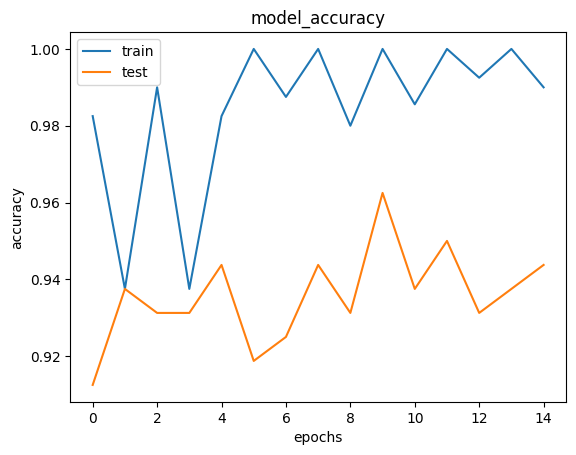

In [102]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()

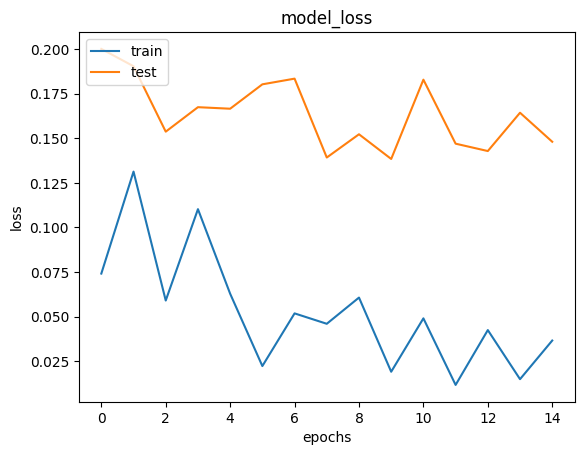

In [103]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [100]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', patience=5)

In [97]:
model_final.save('model_final.h5')

In [113]:
class_dictionary={}
class_dictionary[0]='empty'
class_dictionary[1]='occupied'

In [104]:
class_dictionary

{}

In [115]:
def make_prediction(image_path):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (48, 48))
    image = image / 255.0
    image = image.reshape(1, 48, 48, 3)

    prediction = model_final.predict(image)
    intid = np.argmax(prediction[0])

    label = class_dictionary[int(intid)]
    return label


In [111]:
import os
print(os.path.exists("/content/drive/MyDrive/parking project/train_data/train/occupied/roi_1.png"))


True


In [116]:
make_prediction("/content/drive/MyDrive/parking project/train_data/train/occupied/roi_1.png")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


'occupied'

In [118]:
make_prediction("/content/drive/MyDrive/parking project/train_data/train/empty/spot507.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


'empty'

In [119]:
model_final.save("model_final.h5")